In [1]:
import matplotlib as mpl
mpl.use('pgf')

In [58]:
import matplotlib.pyplot as plt
from matplotlib import patches, transforms as mtransforms
import pandas as pd
import numpy as np


In [3]:
%matplotlib inline
plt.style.use('seaborn-talk')

In [136]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='cm')

In [148]:
num_circles = 3
circle_radius = .05
x_coords = [0.075, .2, .4, .7, .9]
y_coords = [0.15, .4, .5,  .8, .9]

text_params = {'horizontalalignment' :'center', 'verticalalignment':'center',} 

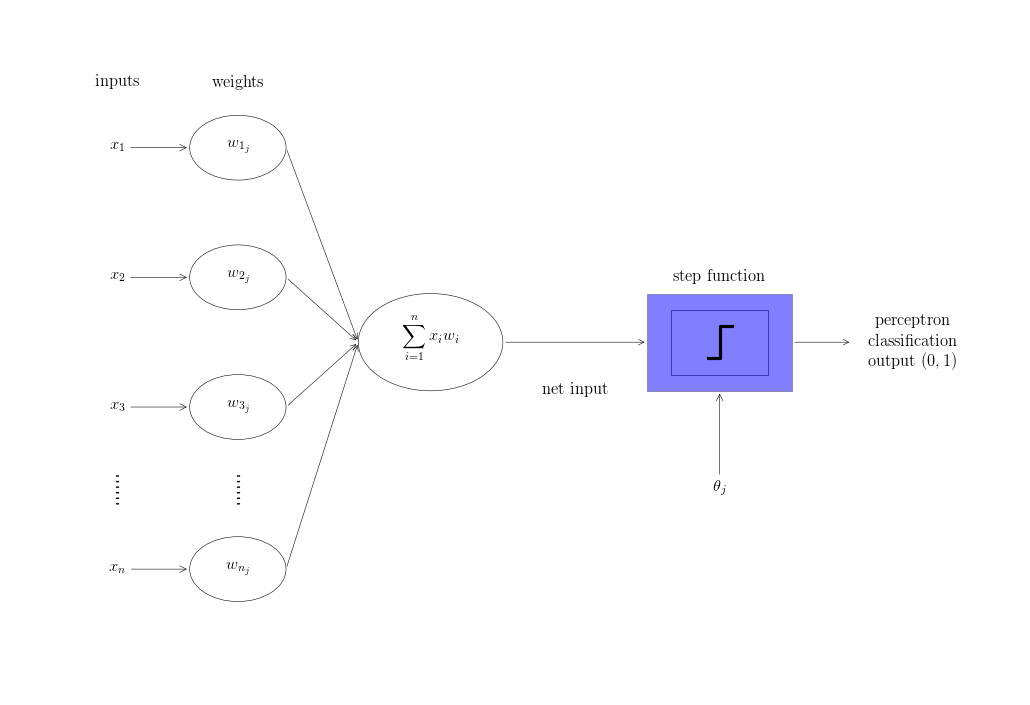

In [174]:
fig, ax = plt.subplots()

ax.set_axis_off()
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

  
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.text(x=x_coords[1], y=y_coords[-1], s=r"weights", transform=ax.transAxes, fontsize=12, **text_params)
ax.text(x=x_coords[0], y=y_coords[-1], s=r"inputs", transform=ax.transAxes, fontsize=12, **text_params)

for idx, loc in enumerate(reversed(np.linspace(y_coords[1],y_coords[-2], num_circles))):
    
    ax.add_patch(patches.Circle([x_coords[1], loc], circle_radius, fill=False))
    ax.text(x=x_coords[1], y=loc, s=r'$w_{' + str(idx+1) + "_j}$", fontsize=12, **text_params)
    ax.annotate(s=r'$x_' + str(idx + 1) + '$', xytext=[x_coords[0], loc], fontsize=12,
                xy=[x_coords[1]-circle_radius,loc],arrowprops={'arrowstyle':'->'}, **text_params)
    ax.annotate(s=r'', xytext=[x_coords[1]+circle_radius, loc], 
                xy=[x_coords[2]-1.5 * circle_radius, y_coords[2]],
               arrowprops={'arrowstyle':'->'}, **text_params)
                
for x in x_coords[:2]:    
    ax.vlines(x=x, ymin=y_coords[0] + 2 * circle_radius, ymax=y_coords[1] - 2 * circle_radius, linestyle='dotted')

# Plot the bottom Row    
ax.add_patch(patches.Circle([x_coords[1], y_coords[0]], circle_radius, fill=False))
ax.text(x=x_coords[1], y=y_coords[0], s=r'$w_{n_j}$', fontsize=12, **text_params)
ax.annotate(s=r'$x_n$', xytext=[x_coords[0], y_coords[0]], xy=[x_coords[1]-circle_radius,y_coords[0]],
            arrowprops={'arrowstyle':'->'}, fontsize=12, **text_params)
ax.annotate(s=r'', xytext=[x_coords[1]+circle_radius, y_coords[0]], 
            xy=[x_coords[2]-1.5 * circle_radius, y_coords[2]],
               arrowprops={'arrowstyle':'->'}, **text_params)

# Add the middle circle
ax.add_patch(patches.Circle(xy=[x_coords[2],y_coords[2]], radius=1.5 * circle_radius, fill=False))
ax.text(s=r"$$\sum_{i=1}^n x_i w_i $$", x=x_coords[2], y=y_coords[2], fontsize=12, **text_params)


# Add the Final Square
ax.add_patch(patches.Rectangle(xy=[x_coords[3] - circle_radius, y_coords[2] - circle_radius], 
                               height= 2 * circle_radius, width=2 * circle_radius, fill=False,zorder=1))
ax.add_patch(patches.Rectangle(xy=[x_coords[3] - 1.5 * circle_radius, y_coords[2] - 1.5 * circle_radius], 
                               height=3 * circle_radius, width=3 * circle_radius, fill=True, alpha=.5, zorder=2))
ax.annotate(s=r'', xytext=[x_coords[2]+1.5 * circle_radius, y_coords[2]], 
            xy=[x_coords[3]-1.5 * circle_radius, y_coords[2]],
               arrowprops={'arrowstyle':'->'}, **text_params)
ax.text(s=r'net input', x=np.mean(x_coords[2:4]), y=x_coords[2] + .5 * circle_radius, fontsize=12, **text_params)

#Label the square
ax.annotate(s=r'$\theta_j$', xy=[x_coords[3], y_coords[2]-1.5*circle_radius], 
            xytext=[x_coords[3], np.mean(y_coords[:2])], fontsize=12, arrowprops={'arrowstyle':'->'}, 
            **text_params)
ax.annotate(s=r'step function', xy=[x_coords[3], y_coords[2]+1.5*circle_radius], 
            xytext=[x_coords[3], y_coords[2] + 2 * circle_radius], fontsize=12, **text_params)
ax.text(s=r' \begin{center} perceptron \\ classification \\ output $(0,1)$ \end{center}',
       x=x_coords[4], y=y_coords[2], fontsize=12, **text_params)
ax.annotate(s='', xytext=[x_coords[3]+1.5*circle_radius, y_coords[2]], 
            xy=[x_coords[4] - 1.25 * circle_radius, y_coords[2]],
            arrowprops={'arrowstyle':'->'})

# Draw the Step function
ax.step(x=[x_coords[3] - .25 * circle_radius, x_coords[3], x_coords[3] + .25 * circle_radius],
        y=[y_coords[2] - .5 * circle_radius, y_coords[2] - .5 * circle_radius, y_coords[2] + .5 * circle_radius],
        color='black')
           
plt.tight_layout()
fig.savefig('try_file.pdf', frameon=False, format='pdf')